<a href="https://colab.research.google.com/github/jonahcoutinho/Machine-Learning/blob/main/logistic_regresssion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("/content/insurance_data.csv")
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


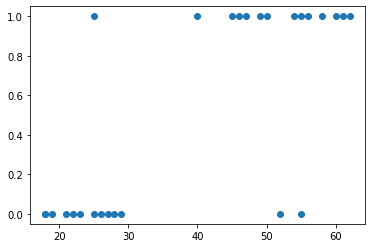

In [4]:
plt.scatter(df.age,df.bought_insurance)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X=df[['age']]
y=df.bought_insurance

In [8]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.1)

In [9]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
model.predict(xtest)

array([0, 1, 0])

In [11]:
ytest

18    0
2     1
10    0
Name: bought_insurance, dtype: int64

In [12]:
model.score(xtest,ytest)

1.0

In [13]:
#kaggle pactice

In [18]:
df=pd.read_csv('/content/HR_comma_sep.csv')

In [19]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [20]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [27]:
#no of people that left
df.left.sum()
#or
no_of_left=df[df.left==1]
no_of_left.shape

(3571, 10)

In [29]:
#no of people that stayed
no_of_stayed=df[df.left==0]
no_of_stayed.shape

(11428, 10)

In [33]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [52]:
#WORK ACCIDENT INSIGNIFICANT BECAUSE PEOPLE WHO HAD ACCIDENTS DID DID NOT LEAVE IN LARGE NUMBERS
m=df[df.Work_accident==1]
m=m[m.left==1]
m.shape

(169, 10)

-satisfaction levels of people who left are low
-people who stayed got promotion (more likely)





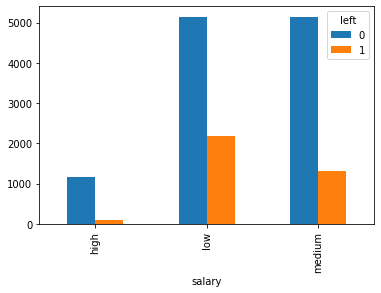

In [41]:
#visualisation

pd.crosstab(df.salary,df.left).plot(kind='bar')

In [43]:
pd.crosstab(df.Department,df.left)

left,0,1
Department,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


In [54]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

FINAL LIST IS :

1.   satisfaction level
2.   average monthly hours
3.   promotion last 5 years
4.   salary



In [56]:
#check for missing data
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [57]:
#great so now we can start with modeling

In [ ]:
#convert categorical to dummies


In [58]:
X=df[['satisfaction_level', 'average_montly_hours','promotion_last_5years','salary']]

In [62]:
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [63]:
sal_dummies=pd.get_dummies(X.salary)

In [64]:
sal_dummies

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [67]:
new=pd.concat([X,sal_dummies],axis=1)

In [72]:
X=new.drop(['medium','salary'],axis='columns')

In [74]:
y=df.left

In [75]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3)


In [76]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
pred=model.predict(xtest)

In [84]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,ytest)

0.7762222222222223

In [85]:
model.score(xtest,ytest)

0.7762222222222223